In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd

# Load the datasets
bike_stations = pd.read_csv('data/bike_stations.csv')
foursquare_data = pd.read_csv('data/full_foursquare_data.csv')
yelp_data = pd.read_csv('data/full_yelp_data.csv')

# Rename latitude and longitude columns in CityBikes data for merging
bike_stations = bike_stations.rename(columns={
    'latitude': 'bike_latitude',
    'longitude': 'bike_longitude'
})

# Drop duplicates to avoid data multiplication
foursquare_data = foursquare_data.drop_duplicates(subset=['bike_latitude', 'bike_longitude', 'name'])
yelp_data = yelp_data.drop_duplicates(subset=['bike_latitude', 'bike_longitude', 'name'])

# Merge Foursquare data with Bike Stations data
merged_fs_bikes = pd.merge(
    foursquare_data,
    bike_stations,
    on=['bike_latitude', 'bike_longitude'],
    how='right'
)

# Merge Yelp data with Bike Stations data
merged_yp_bikes = pd.merge(
    yelp_data,
    bike_stations,
    on=['bike_latitude', 'bike_longitude'],
    how='right'
)

# Now merge the two datasets (Foursquare + Bikes and Yelp + Bikes) using both name and coordinates
merged_df = pd.merge(
    merged_fs_bikes,
    merged_yp_bikes,
    on=['id'],
    suffixes=('_foursquare', '_yelp'),
    how='outer'
)

# Save the merged dataframe
merged_df.to_csv('merged_data.csv', index=False)

# Display the merged dataframe
print(merged_df.head())
print(merged_df.info())

   distance_foursquare name_x_foursquare  popularity  rating_foursquare  \
0                  308    Kingyo Izakaya    0.979517                9.1   
1                  308    Kingyo Izakaya    0.979517                9.1   
2                  308    Kingyo Izakaya    0.979517                9.1   
3                  308    Kingyo Izakaya    0.979517                9.1   
4                  308    Kingyo Izakaya    0.979517                9.1   

   latitude_foursquare  longitude_foursquare category_foursquare  \
0            49.290643           -123.136956    Sushi Restaurant   
1            49.290643           -123.136956    Sushi Restaurant   
2            49.290643           -123.136956    Sushi Restaurant   
3            49.290643           -123.136956    Sushi Restaurant   
4            49.290643           -123.136956    Sushi Restaurant   

   bike_latitude_foursquare  bike_longitude_foursquare  \
0                 49.291909                -123.140713   
1                 49.291

In [3]:
import pandas as pd

# Load the datasets
bike_stations = pd.read_csv('data/bike_stations.csv')
foursquare_data = pd.read_csv('data/full_foursquare_data.csv')
yelp_data = pd.read_csv('data/full_yelp_data.csv')

# Rename latitude and longitude columns in CityBikes data for merging
bike_stations = bike_stations.rename(columns={
    'latitude': 'bike_latitude',
    'longitude': 'bike_longitude'
})

# Drop duplicates to avoid data multiplication
foursquare_data = foursquare_data.drop_duplicates(subset=['bike_latitude', 'bike_longitude', 'name'])
yelp_data = yelp_data.drop_duplicates(subset=['bike_latitude', 'bike_longitude', 'name'])

# Merge Foursquare data with Bike Stations data
merged_fs_bikes = pd.merge(
    foursquare_data,
    bike_stations[['bike_latitude', 'bike_longitude', 'free_bikes', 'empty_slots']],
    on=['bike_latitude', 'bike_longitude'],
    how='right'
)

# Merge Yelp data with Bike Stations data
merged_yp_bikes = pd.merge(
    yelp_data,
    bike_stations[['bike_latitude', 'bike_longitude', 'free_bikes', 'empty_slots']],
    on=['bike_latitude', 'bike_longitude'],
    how='right'
)

# Now merge the two datasets (Foursquare + Bikes and Yelp + Bikes) using both name and coordinates
merged_df = pd.merge(
    merged_fs_bikes,
    merged_yp_bikes,
    on=['bike_latitude', 'bike_longitude', 'name', 'free_bikes', 'empty_slots'],
    suffixes=('_foursquare', '_yelp'),
    how='outer'
)

# Save the merged dataframe
merged_df.to_csv('data/merged_data.csv', index=False)

# Display the merged dataframe
print(merged_df.head())
print(merged_df.info())

   distance_foursquare                        name  popularity  \
0                  NaN                26 Viet Cafe         NaN   
1                  NaN  41 Noodle & Rice Pot House         NaN   
2                483.0                     41 West    0.847293   
3                385.0            Adonia Tea House    0.946027   
4                487.0                 Ajisai 2 Go    0.962675   

   rating_foursquare  latitude_foursquare  longitude_foursquare  \
0                NaN                  NaN                   NaN   
1                NaN                  NaN                   NaN   
2                NaN            49.234772           -123.159256   
3                6.2            49.234731           -123.153740   
4                NaN            49.233773           -123.153901   

  category_foursquare  bike_latitude  bike_longitude  free_bikes  empty_slots  \
0                 NaN      49.238105     -123.154966           4           14   
1                 NaN      49.238105  

In [4]:
#to see the numbr of unique business names
merged_df.name.unique().size

2054

In [5]:
merged_df.describe()

,distance_foursquare,popularity,rating_foursquare,latitude_foursquare,longitude_foursquare,bike_latitude,bike_longitude,free_bikes,empty_slots,distance_yelp,rating_yelp,review_count,latitude_yelp,longitude_yelp
count,12234.000000,12164.000000,9774.000000,12234.000000,12234.000000,23090.000000,23090.000000,23090.000000,23090.000000,12854.000000,12854.000000,12854.000000,12854.000000,12854.000000
mean,606.220860,0.913066,7.950379,49.271765,-123.121526,49.271506,-123.122356,7.580728,10.254569,811.151393,4.049627,328.547300,49.272036,-123.122150
std,253.998053,0.188163,0.815338,0.010836,0.038221,0.011379,0.038807,5.031376,5.724097,519.184974,0.461818,392.678424,0.011659,0.038454
min,8.000000,0.002980,4.800000,49.231497,-123.258935,49.238105,-123.254307,0.000000,0.000000,2.000000,0.000000,0.000000,49.231051,-123.258370
25%,414.250000,0.950212,7.500000,49.263838,-123.136421,49.263073,-123.138921,4.000000,7.000000,344.000000,3.900000,87.000000,49.263896,-123.134920
50%,630.000000,0.973014,8.100000,49.270544,-123.117447,49.270783,-123.118130,7.000000,10.000000,736.000000,4.100000,190.000000,49.273438,-123.119086
75%,824.000000,0.985710,8.600000,49.280919,-123.100752,49.280284,-123.099917,11.000000,14.000000,1249.000000,4.300000,422.000000,49.281120,-123.100882
max,3793.000000,0.999885,9.300000,49.308706,-123.045331,49.302577,-123.056909,28.000000,34.000000,3072.000000,5.000000,2748.000000,49.312808,-123.043871


In [6]:
merged_df.dtypes

distance_foursquare     float64
name                     object
popularity              float64
rating_foursquare       float64
latitude_foursquare     float64
longitude_foursquare    float64
category_foursquare      object
bike_latitude           float64
bike_longitude          float64
free_bikes                int64
empty_slots               int64
distance_yelp           float64
rating_yelp             float64
review_count            float64
latitude_yelp           float64
longitude_yelp          float64
category_yelp            object
dtype: object

Data Cleaning

In [7]:
# Drop duplicates based on 'name' and coordinates
merged_df.drop_duplicates(subset=['name', 'bike_latitude', 'bike_longitude'], inplace=True)



# Drop rows where both latitude and longitude are missing
merged_df.dropna(subset=['bike_latitude', 'bike_longitude'], inplace=True)


#to combine rating columns
merged_df['rating_foursquare_half'] = merged_df['rating_foursquare']/2

# Fill missing review_count and 'popularity' with 0 for visualization purposes
merged_df['review_count'] = merged_df['review_count'].fillna(0)
merged_df['popularity'].fillna(0, inplace=True)

# Convert review_count to integer
merged_df['review_count'] = merged_df['review_count'].astype(int)

# Combine similar data points
merged_df['rating'] = merged_df[['rating_foursquare_half', 'rating_yelp']].mean(axis=1)
merged_df['distance'] = merged_df[['distance_foursquare', 'distance_yelp']].mean(axis=1)
merged_df['category'] = merged_df['category_foursquare'].combine_first(merged_df['category_yelp'])

# Drop redundant columns
merged_df.drop(['category_foursquare', 'category_yelp','rating_foursquare','rating_foursquare_half', 'rating_yelp','distance_foursquare','distance_yelp'], axis=1, inplace=True)

merged_df.drop(['latitude_foursquare', 'longitude_foursquare','latitude_yelp','longitude_yelp'], axis=1, inplace=True)

# Save the cleaned and standardized data
merged_df.to_csv('data/cleaned_merged_data.csv', index=False)

# Display the first few rows and info
print(merged_df.head())
print(merged_df.info())


C:\Users\ipeko\AppData\Local\Temp\ipykernel_13000\1744881227.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['popularity'].fillna(0, inplace=True)


                         name  popularity  bike_latitude  bike_longitude  \
0                26 Viet Cafe    0.000000      49.238105     -123.154966   
1  41 Noodle & Rice Pot House    0.000000      49.238105     -123.154966   
2                     41 West    0.847293      49.238105     -123.154966   
3            Adonia Tea House    0.946027      49.238105     -123.154966   
4                 Ajisai 2 Go    0.962675      49.238105     -123.154966   

   free_bikes  empty_slots  review_count  rating  distance          category  
0           4           14            12     4.4     428.0        Vietnamese  
1           4           14            51     4.1     477.0           Chinese  
2           4           14             0     NaN     483.0            Bakery  
3           4           14             0     3.1     385.0       Coffee Shop  
4           4           14             0     NaN     487.0  Sushi Restaurant  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23090 entries, 0 to

Visualizing the data

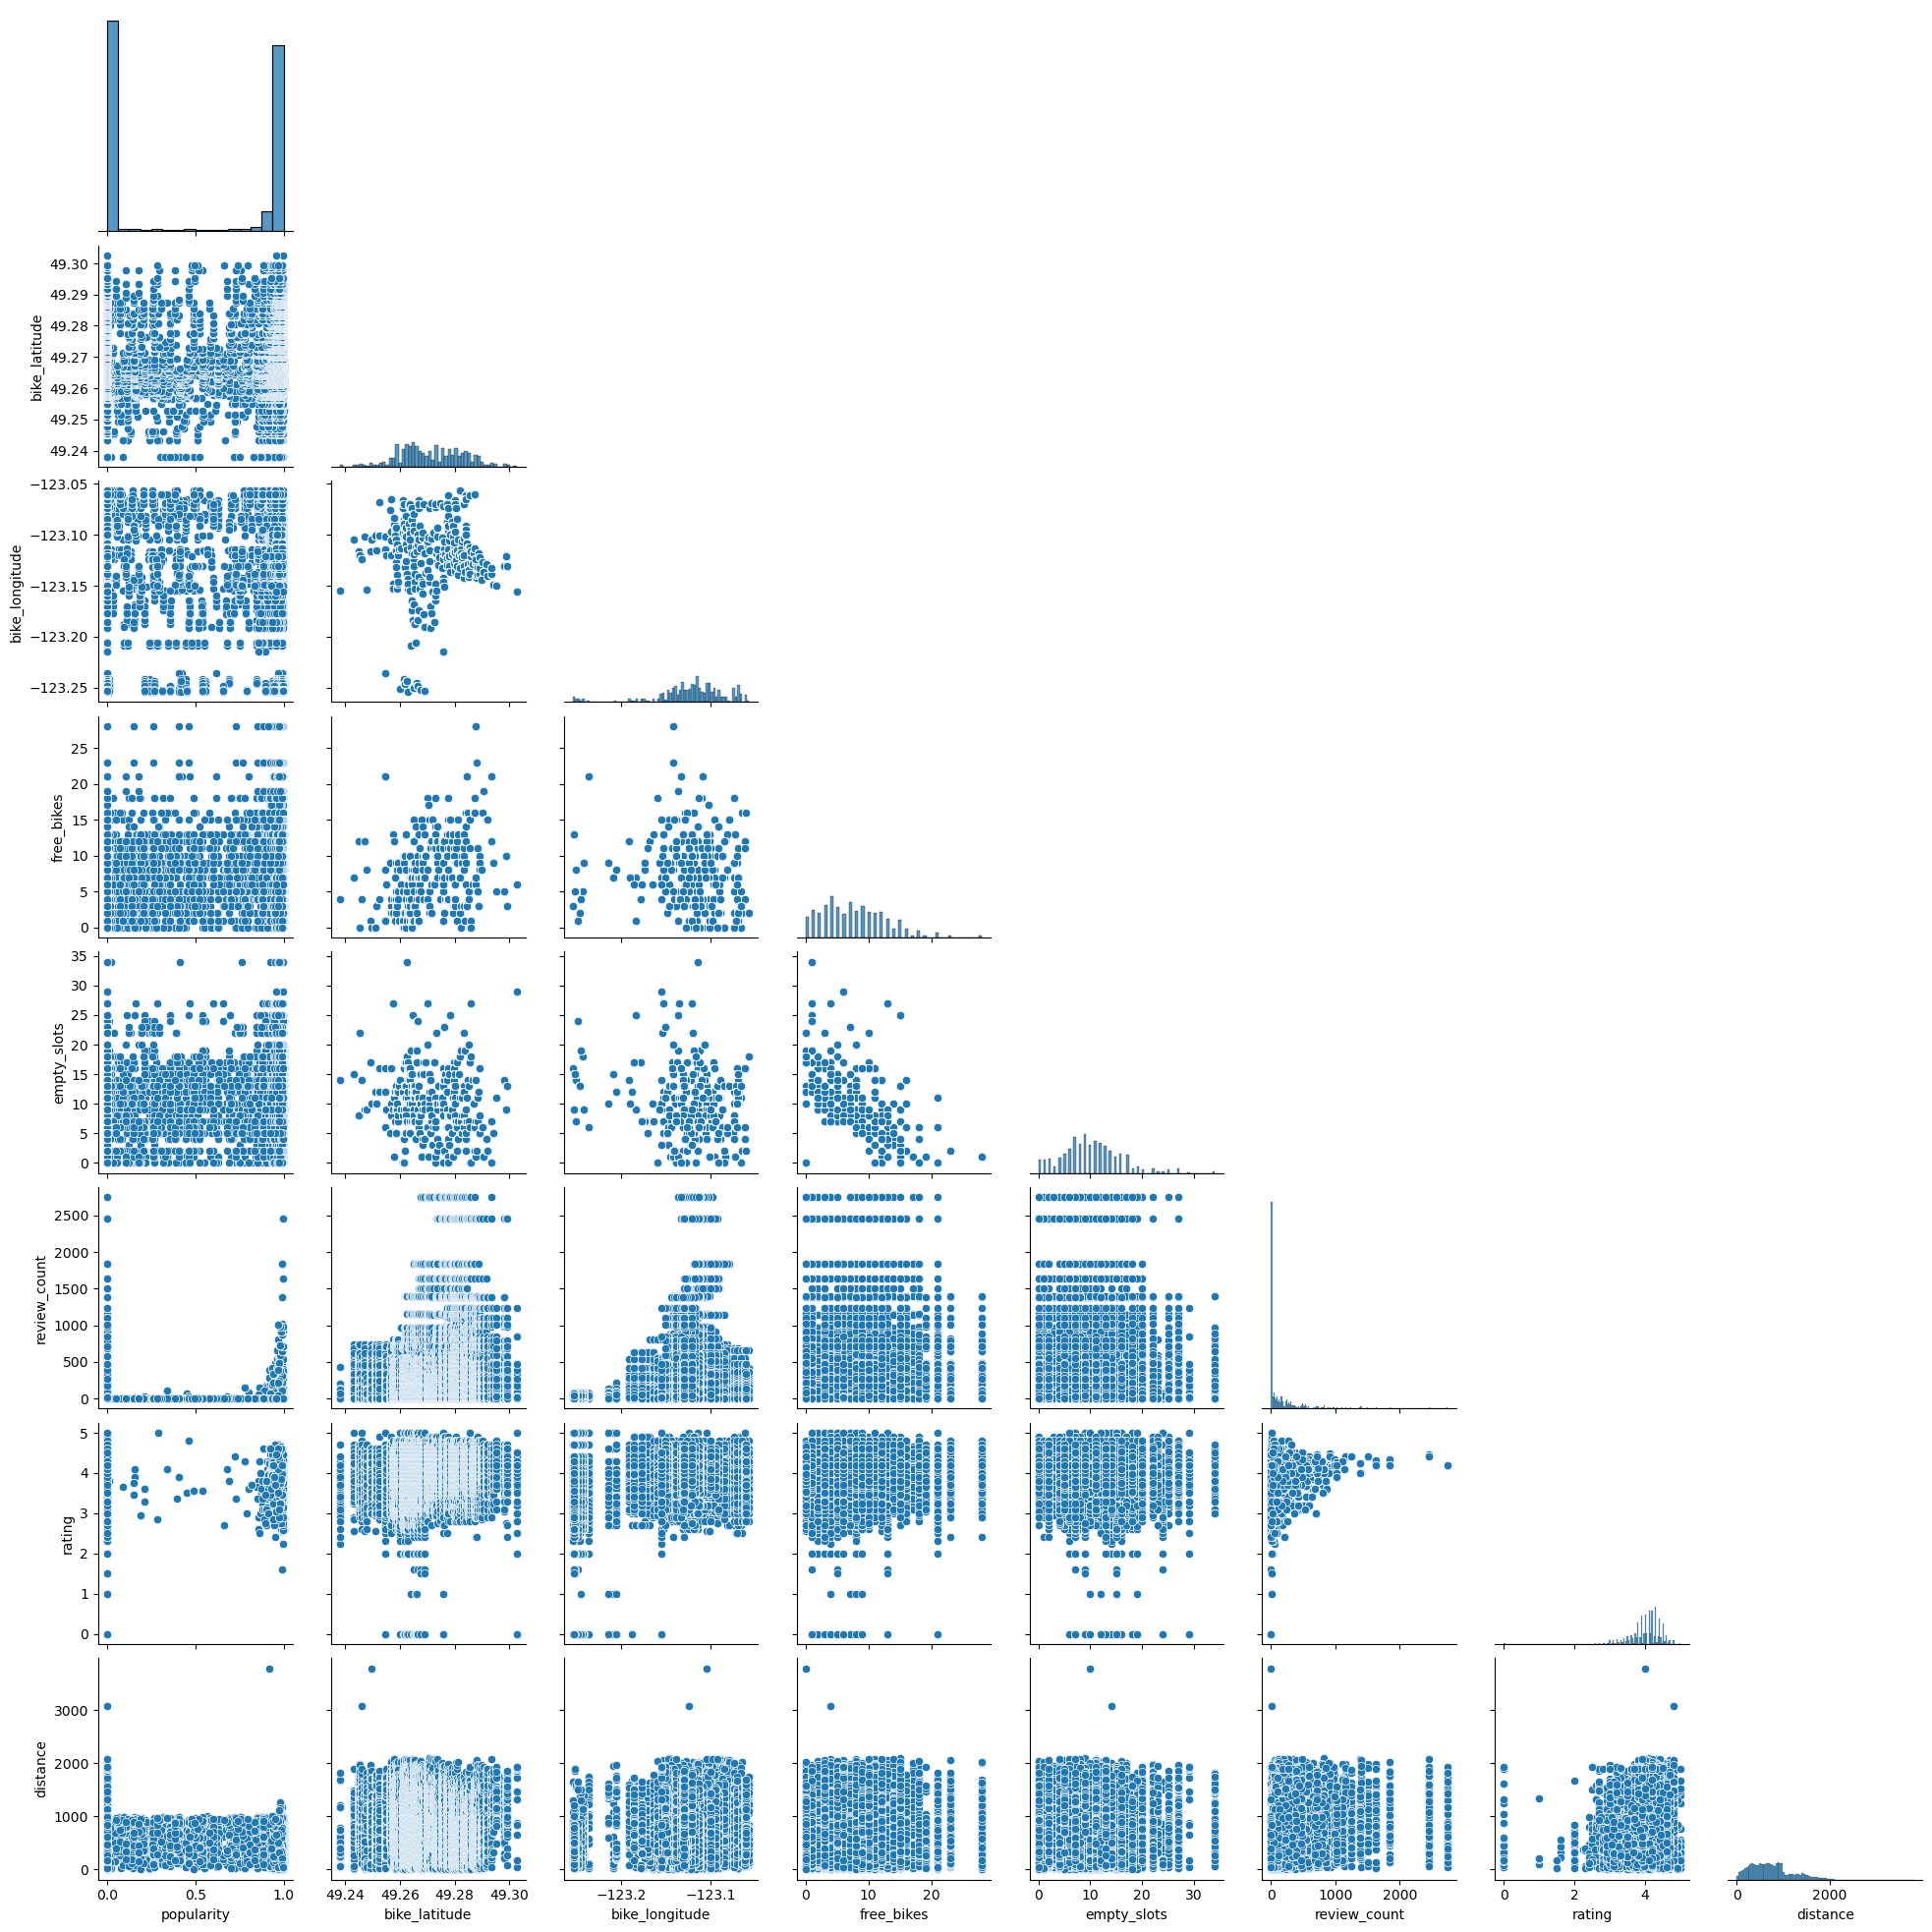

In [17]:
sns.pairplot(merged_df, corner=True)

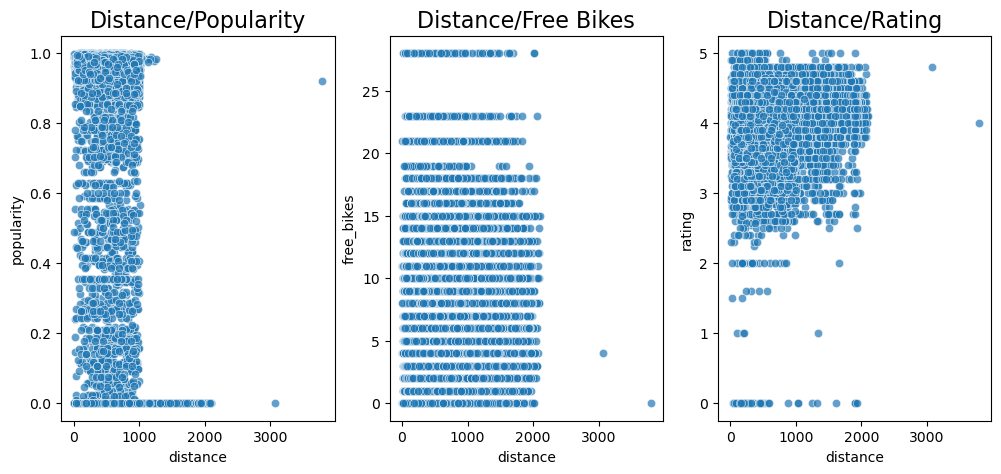

In [9]:
fig, ax = plt.subplots(1, 3, figsize=(12, 5))

sns.scatterplot(data=merged_df, x='distance', y='popularity',alpha=0.7, ax=ax[0])
ax[0].set_title('Distance/Popularity', fontsize=16)

sns.scatterplot(data=merged_df, x='distance', y='free_bikes',alpha=0.7, ax=ax[1])
ax[1].set_title('Distance/Free Bikes', fontsize=16)

sns.scatterplot(data=merged_df, x='distance', y='rating',alpha=0.7, ax=ax[2])
ax[2].set_title('Distance/Rating', fontsize=16)

plt.show()

Observations:

-Distance vs. Popularity:
The majority of the popularity scores are clustered between 0 and 1, indicating that most POIs have been assigned a high popularity score.

A few outliers with very high distances have very low popularity scores, suggesting that the farther the POI is from the bike station, the lower its popularity tends to be.

-Distance vs. Empty Slots:

There is a clear concentration of high-rated POIs close to the bike stations, suggesting that more popular or well-rated venues are more accessible.

-limited correlation between parameters

### Database

In [10]:
import sqlite3
from sqlite3 import Error
import os

In [11]:
from pathlib import Path

In [16]:
def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection

#to avoid locking issues
db_path = 'data/cleaned_merged_data.db'
if os.path.exists(db_path):
    os.remove(db_path)

connection = create_connection('data/cleaned_merged_data.db')

#Function to execute SQL
def execute_query(connection, query):
    cursor = connection.cursor()
    result = None
    try:
        cursor.execute(query)
        result = cursor.fetchall()
        return result
    except Error as e:
        print(f"The error '{e}' occurred")

# Function to execute read queries
def execute_read_query(connection, query):
    cursor = connection.cursor()
    result = None
    try:
        cursor.execute(query)
        result = cursor.fetchall()
        return result
    except Error as e:
        print(f"The error '{e}' occurred")


# Create Table
create_table_query = """
CREATE TABLE IF NOT EXISTS poi_data (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT,
    bike_latitude REAL,
    bike_longitude REAL,
    free_bikes INTEGER,
    empty_slots INTEGER,
    distance REAL,
    rating REAL,
    popularity REAL,
    category TEXT,
    review_count INTEGER
);
"""
execute_query(connection, create_table_query)

# Load the cleaned dataset
df = pd.read_csv('data/cleaned_merged_data.csv')

# Insert data into the table
for index, row in df.iterrows():
    # Replace NaN with NULL or a default value
    row = row.fillna("NULL")

    insert_query = f"""
    INSERT INTO poi_data(name, bike_latitude, bike_longitude, free_bikes, empty_slots, distance, rating, popularity, category, review_count)
    VALUES ("{row['name']}", {row['bike_latitude']}, {row['bike_longitude']}, {row['free_bikes']}, {row['empty_slots']}, 
            {row['distance']}, {row['rating']}, {row['popularity']}, "{row['category']}", {row['review_count']});
    """
    try:
        execute_query(connection, insert_query)
    except Error as e:
        print(f"Error inserting data at index {index}: {e}")

# Validate data insertion
select_query ="SELECT COUNT(*) FROM poi_data;"
result = execute_read_query(connection, select_query)
print(f"Total records inserted: {result[0][0]}")

# Check the first few rows
select_data_query= "SELECT * FROM poi_data LIMIT 5;"
data_sample = execute_read_query(connection, select_data_query)
print("Sample Data:", data_sample)


# Check for missing values in critical columns
missing_data_query = """
SELECT 
    COUNT(CASE WHEN rating IS NULL THEN 1 END) AS missing_ratings,
    COUNT(CASE WHEN popularity IS NULL THEN 1 END) AS missing_popularity,
    COUNT(CASE WHEN category IS NULL THEN 1 END) AS missing_categories
FROM poi_data;
"""
missing_data= execute_read_query(connection, missing_data_query)
print("Missing Data Summary:", missing_data)



avg_rating_query = """
SELECT category, AVG(rating) as avg_rating
FROM poi_data
GROUP BY category
ORDER BY avg_rating DESC
LIMIT 10;
"""
avg_rating_data =execute_read_query(connection, avg_rating_query)
print("Top 10 Categories by Average Rating:", avg_rating_data)



# Close the connection
connection.close()

Connection to SQLite DB successful
Total records inserted: 23090
Sample Data: [(1, '26 Viet Cafe', 49.238105, -123.154966, 4, 14, 428.0, 4.4, 0.0, 'Vietnamese', 12), (2, '41 Noodle & Rice Pot House', 49.238105, -123.154966, 4, 14, 477.0, 4.1, 0.0, 'Chinese', 51), (3, '41 West', 49.238105, -123.154966, 4, 14, 483.0, None, 0.8472929379299623, 'Bakery', 0), (4, 'Adonia Tea House', 49.238105, -123.154966, 4, 14, 385.0, 3.1, 0.9460271807428712, 'Coffee Shop', 0), (5, 'Ajisai 2 Go', 49.238105, -123.154966, 4, 14, 487.0, None, 0.9626750618627488, 'Sushi Restaurant', 0)]
Missing Data Summary: [(2232, 0, 0)]
Top 10 Categories by Average Rating: [('Acai Bowls', 4.9), ('Syrian', 4.6), ('Public Art', 4.6), ('Community Service/Non-Profit', 4.6), ('Sandwiches', 4.557731958762886), ('Cocktail Bar', 4.55), ('Distilleries', 4.5440000000000005), ('Soup', 4.5), ('Airport Shuttles', 4.5), ('Afghan', 4.484375)]
